In [1]:
# In this notebook, you learn:
#
# 1) How to calculate gradients wrt every variable in a mathematical expression using chain rule?
# 2) How to visualize the gradients in the expression graph?
#
#
# Resources:
# 1) https://www.youtube.com/watch?v=VMj-3S1tku0&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ&index=1&pp=iAQB
#       -- This video explains how to calculate gradients for a mathematical expression.

In [2]:
from graphviz import Digraph

In [3]:
# Creating variables required to create a simple mathematical expression.
var1 = 2.0
var2 = 3.0
var3 = 4.0
var4 = 5.0

$$f(var1, var2, var3, var4) = (((var1 * var2) + var3) * var4)$$

In [4]:
# Lets create a simple mathematical expression.
# f(var1, var2, var3, var4) = ((var1 * var2) + var3)) * var4
interim1 = var1 * var2
print(f"interim1: {interim1}")
interim2 = interim1 + var3
print(f"interim2: {interim2}")
output = interim2 * var4
print(f"output: {output}")

interim1: 6.0
interim2: 10.0
output: 50.0


In [5]:
# Let's put the above expression into a function to make it reusable.
def f(var1: float, var2: float, var3: float, var4: float) -> float:
    interim1 = var1 * var2
    interim2 = interim1 + var3
    output = interim2 * var4
    return output

In [6]:
# Let's visualize this as an expression graph.
dot = Digraph(name='ExpressionGraph', format="png", graph_attr={'rankdir': 'LR'})
# Adding nodes to the graph.
dot.node('var1', label=f'var1 | {var1}', shape="record")
dot.node('var2', label=f'var2 | {var2}', shape="record")
dot.node('var3', label=f'var3 | {var3}', shape="record")
dot.node('var4', label=f'var4 | {var4}', shape="record")
dot.node('interim1', label=f'interim1 | {interim1}', shape="record")
dot.node('interim2', label=f'interim2 | {interim2}', shape="record")
dot.node('output', label=f'output | {output}', shape="record")
dot.node('interim1_op', label='*')
dot.node('interim2_op', label='+')
dot.node('output_op', label='*')
# Adding edges to the graph.
dot.edge('var1', 'interim1_op')
dot.edge('var2', 'interim1_op')
dot.edge('interim1_op', 'interim1')
dot.edge('interim1', 'interim2_op')
dot.edge('var3', 'interim2_op')
dot.edge('interim2_op', 'interim2')
dot.edge('interim2', 'output_op')
dot.edge('var4', 'output_op')
dot.edge('output_op', 'output')

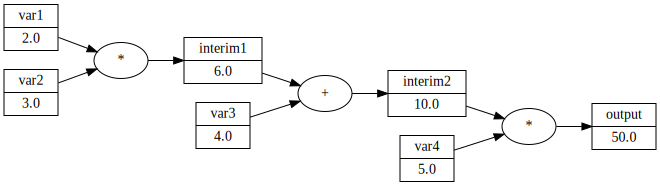

In [7]:
# Let's visualize the graph.
dot

Let's come from the right side to the left side in the expression and calculate gradients. 

Note that $f$ here is the same as $output$ in the above expression graph.

$$f = interim2 * var4$$
$$\implies \frac{\partial{f}}{\partial{var4}} = interim2$$
$$\implies \frac{\partial{f}}{\partial{interim2}} = var4$$

---

Now, let's calculate the derivative of $f$ wrt $var3$.

From chain rule, we know that:

$$\frac{\partial{f}}{\partial{var3}} = \frac{\partial{f}}{\partial{interim2}} * \frac{\partial{interim2}}{\partial{var3}}$$

Also, consider the sub-expression that relates $interim2$ and $var3$.:

$$interim2 = interim1 + var3$$

$$\implies \frac{\partial{interim2}}{\partial{var3}} = \frac{\partial{interim2}}{\partial{interim1}} = 1$$

Hence, if we already know $\frac{\partial{f}}{\partial{interim2}}$, we can calculate $\frac{\partial{f}}{\partial{var3}}$ and $\frac{\partial{f}}{\partial{interim1}}$ using the chain rule.

In other words, if we know the gradients of the main function $f$ with the dependent variables, we can calculate the gradient <br>
wrt to the variable of interest i.e., $var3$ in this case. We will later generalize this behaviour to find the gradient wrt every <br>
single variable in the expression in an automated manner.

$$\implies \frac{\partial{f}}{\partial{var3}} = \frac{\partial{f}}{\partial{interim1}} = var4 * 1 = var4$$

---

Next, let's calculate the gradient wrt $var1$.

Applying the chain rule once again:

$$\frac{\partial{f}}{\partial{var1}} = \frac{\partial{f}}{\partial{interim1}} * \frac{\partial{interim1}}{\partial{var1}}$$

We aleady know that 

$$interim1 = var1 * var2$$
$$\implies \frac{\partial{interim1}}{\partial{var1}} = var2$$

Therefore,

$$\frac{\partial{f}}{var1} = var4 * var2$$

By Symmetry,

$$\frac{\partial{f}}{var2} = var4 * var1$$

---

We calculated the gradients wrt to every variable in the expression graph by applying the chain rule <br>
repeatedly from left to right. In summary, the gradients are:

$$\frac{\partial{f}}{\partial{interim2}} = var4$$
$$\frac{\partial{f}}{\partial{var4}} = interim2$$
$$\frac{\partial{f}}{\partial{interim1}} = var4$$
$$\frac{\partial{f}}{\partial{var3}} = var4$$
$$\frac{\partial{f}}{var2} = var4 * var1$$
$$\frac{\partial{f}}{var1} = var4 * var2$$

In [8]:
# Change introduced to calculate gradients for the expression.
h = 0.0001

In [9]:
# Lets calculate the gradients manually and verify that the formulae match with the gradients.
dvar1 = (f(var1 + h, var2, var3, var4) - f(var1, var2, var3, var4)) / h
print(f"manual dvar1: {dvar1}, math dvar1: {var2 * var4}")
dvar2 = (f(var1, var2 + h, var3, var4) - f(var1, var2, var3, var4)) / h
print(f"manual dvar2: {dvar2}, math dvar2: {var1 * var4}")
dvar3 = (f(var1, var2, var3 + h, var4) - f(var1, var2, var3, var4)) / h
print(f"manual dvar3: {dvar3}, math dvar3: {var4}")
dvar4 = (f(var1, var2, var3, var4 + h) - f(var1, var2, var3, var4)) / h
print(f"manual dvar4: {dvar4}, math dvar4: {interim2}")
# Note that we cannot calculate the gradients for the output w.r.t. the interim1, interim2 using this method
# since we cannot change the values of the interim1, interim2 directly.

manual dvar1: 15.000000000071623, math dvar1: 15.0
manual dvar2: 9.999999999976694, math dvar2: 10.0
manual dvar3: 5.000000000023874, math dvar3: 5.0
manual dvar4: 9.999999999976694, math dvar4: 10.0


In the above expression, every variable impacts only 1 variable. However, in general, each variable could impact multiple <br>
variables and the gradient in turn depends on multiple paths. Lets conside one such expression and repeat the above <br>
process.

In [10]:
# Let's consider the expression - f(var1, var2, var3) = ((var1 + var2) * var1) + var3
var1 = 2.0
var2 = 3.0
var3 = 4.0
interim1 = var1 + var2
interim2 = interim1 * var1
output = interim2 + var3
print(f"output: {output}")

output: 14.0


In [11]:
def f_complex(var1: float, var2: float, var3: float) -> float:
    interim1 = var1 + var2
    interim2 = interim1 * var1
    output = interim2 + var3
    return output

In [12]:
# Let's visualize this complex expression as a graph.
dot_complex = Digraph(name='ComplexExpressionGraph', format="png", graph_attr={'rankdir': 'LR'})
# Adding nodes to the graph.
dot_complex.node('var1', label=f'var1 | {var1}', shape="record")
dot_complex.node('var2', label=f'var2 | {var2}', shape="record")
dot_complex.node('var3', label=f'var3 | {var3}', shape="record")
dot_complex.node('interim1', label=f'interim1 | {interim1}', shape="record")
dot_complex.node('interim2', label=f'interim2 | {interim2}', shape="record")
dot_complex.node('output', label=f'output | {output}', shape="record")
dot_complex.node('interim1_op', label='+')
dot_complex.node('interim2_op', label='*')
dot_complex.node('output_op', label='+')
# Adding edges to the graph.
dot_complex.edge('var1', 'interim1_op')
dot_complex.edge('var2', 'interim1_op')
dot_complex.edge('interim1_op', 'interim1')
dot_complex.edge('var1', 'interim2_op')
dot_complex.edge('interim1', 'interim2_op')
dot_complex.edge('interim2_op', 'interim2')
dot_complex.edge('var3', 'output_op')
dot_complex.edge('interim2', 'output_op')
dot_complex.edge('output_op', 'output')

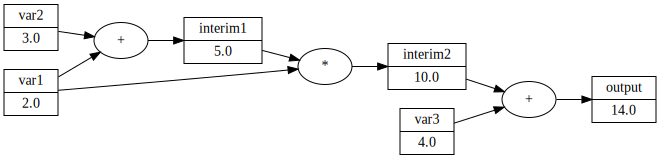

In [13]:
dot_complex

Now let's go through the same expercise as above to calulate gradients using formal math.

Note that $f$ here is the same as $output$ in the above expression graph.

$$f = interim2 + var3$$
$$\implies \frac{\partial{f}}{interim2} = \frac{\partial{f}}{\partial{var3}} = 1$$

---

Now, let's calculate the gradient of $f$ wrt to $interim1$

$$interim2 = interim1 * var1$$
$$\implies \frac{\partial{interim2}}{\partial{interim1}} = var1$$

Applying the chain rule to find the gradient wrt $interim1$

$$\frac{\partial{f}}{\partial{interim1}} = \frac{\partial{f}}{\partial{interim2}} * \frac{\partial{interim2}}{\partial{interim1}}$$
$$\implies \frac{\partial{f}}{\partial{interim1}} = 1 * var1 = var1$$

---

Now, let's move on to the next variable $var2$

$$interim1 = var1 + var2$$
$$\implies \frac{\partial{interim1}}{\partial{var2}} = 1$$

Applying the chain rule again

$$\frac{\partial{f}}{\partial{var2}} = \frac{\partial{f}}{\partial{interim1}} * \frac{\partial{interim1}}{\partial{var2}}$$
$$\implies \frac{\partial{f}}{\partial{var2}} = var1 * 1 = var1$$

---

Now, let's move on to the final and tricky part - Calculating gradient wrt $var1$

$$interim1 = var1 + var2$$
$$\implies \frac{\partial{interim1}}{var1} = 1$$

$$and$$

$$interim2 = interim1 * var1$$
$$\implies \frac{\partial{interim2}}{\partial{var1}} = interim1$$

$var1$ is independently impacts the $output$ through two different paths - through $interim1$ and $interim2$. <br>
Chain rule changes a tiny bit in this case.

Applying the chain rule gives

$$\frac{\partial{f}}{\partial{var1}} = \frac{\partial{f}}{\partial{interim1}} * \frac{\partial{interim1}}{\partial{var1}} + \frac{\partial{f}}{\partial{interim2}} * \frac{\partial{interim2}}{\partial{var1}}$$

It basically says to add the contributions to the gradient from the independent paths.

All the dependent gradients are calculated in the previous steps. We just need to plug the existing formule to find the <br>
gradient formula of $f$ wrt $var1$.

$$\frac{\partial{f}}{\partial{var1}} = var1 * 1 + 1 * interim1$$
$$\implies \frac{\partial{f}}{\partial{var1}} = var1 + interim1$$

We could simplify this further if that seems more intuitive:

$$\frac{\partial{f}}{\partial{var1}} = var1 + (var1 + var2)$$
$$\implies \frac{\partial{f}}{\partial{var1}} = 2 * var1 + var2$$

In [14]:
# Lets calculate the gradients manually and verify that the formulae match with the gradients.
dvar1 = (f_complex(var1 + h, var2, var3) - f_complex(var1, var2, var3)) / h
print(f"manual dvar1: {dvar1}, math dvar1: {2 * var1 + var2}")
dvar2 = (f_complex(var1, var2 + h, var3) - f_complex(var1, var2, var3)) / h
print(f"manual dvar2: {dvar2}, math dvar2: {var1}")
dvar3 = (f_complex(var1, var2, var3 + h) - f_complex(var1, var2, var3)) / h
print(f"manual dvar3: {dvar3}, math dvar3: {1}")

manual dvar1: 7.0001000000097235, math dvar1: 7.0
manual dvar2: 1.9999999999953388, math dvar2: 2.0
manual dvar3: 0.9999999999976694, math dvar3: 1


#### Let's visualize the gradients in the expression graph as well

In [15]:
# To calculate the gradients wrt intermediate variables, we need to fudge the values of the intermediate variables manually.
# Lets do that here.
interim1 = var1 + var2
interim2 = interim1 * var1
output = interim2 + var3

# Calculating gradient wrt interim1. 
interim1_up1 = interim1 + h
interim2_up1 = interim1_up1 * var1
output_up1 = interim2_up1 + var3
dinterim1 = (output_up1 - output) / h
print(f"manual dinterim1: {dinterim1}, math dinterim1: {var1}")

# Calculating gradient wrt interim2.
interim2_up2 = interim2 + h
output_up2 = interim2_up2 + var3
dinterim2 = (output_up2 - output) / h
print(f"manual dinterim2: {dinterim2}, math dinterim2: {1}")

# Since output is the same as function f.
doutput = 1
print(f"manual doutput: {doutput}, math doutput: {1}")

manual dinterim1: 1.9999999999953388, math dinterim1: 2.0
manual dinterim2: 0.9999999999976694, math dinterim2: 1
manual doutput: 1, math doutput: 1


In [16]:
# Let's visualize this complex expression as a graph.
dot_complex_with_grad = Digraph(name='ComplexExpressionGraph', format="png", graph_attr={'rankdir': 'LR'})
# Adding nodes to the graph.
dot_complex_with_grad.node('var1', label=f'var1 | data {var1} | grad {dvar1:.4f}', shape="record")
dot_complex_with_grad.node('var2', label=f'var2 | data {var2} | grad {dvar2:.4f}', shape="record")
dot_complex_with_grad.node('var3', label=f'var3 | data {var3} | grad {dvar3:.4f}', shape="record")
dot_complex_with_grad.node('interim1', label=f'interim1 | data {interim1} | grad {dinterim1:.4f}', shape="record")
dot_complex_with_grad.node('interim2', label=f'interim2 | data {interim2} | grad {dinterim2:.4f}', shape="record")
dot_complex_with_grad.node('output', label=f'output | data {output} | grad {doutput:.4f}', shape="record")
dot_complex_with_grad.node('interim1_op', label='+')
dot_complex_with_grad.node('interim2_op', label='*')
dot_complex_with_grad.node('output_op', label='+')
# Adding edges to the graph.
dot_complex_with_grad.edge('var1', 'interim1_op')
dot_complex_with_grad.edge('var2', 'interim1_op')
dot_complex_with_grad.edge('interim1_op', 'interim1')
dot_complex_with_grad.edge('var1', 'interim2_op')
dot_complex_with_grad.edge('interim1', 'interim2_op')
dot_complex_with_grad.edge('interim2_op', 'interim2')
dot_complex_with_grad.edge('var3', 'output_op')
dot_complex_with_grad.edge('interim2', 'output_op')
dot_complex_with_grad.edge('output_op', 'output')

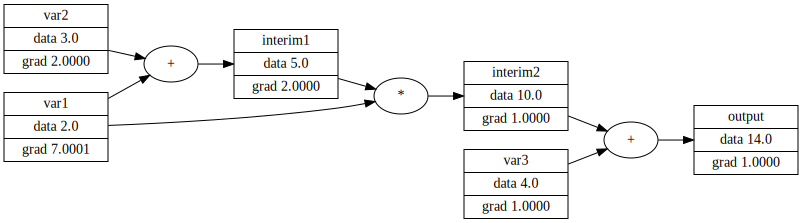

In [18]:
dot_complex_with_grad